In [263]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import tensorflow as tf
import sys
import seaborn as sns
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import minmax_scale
from tensorflow import keras
import random
import itertools

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 100)

from keras import backend as K
K.clear_session()
tf.compat.v1.reset_default_graph()

In [83]:
folder_dir = './Data/Raw_Data'
file_list = os.listdir(folder_dir)
file_list.sort()

In [84]:
non_data = []
for i,_folder_dir in enumerate (file_list):
    path = (folder_dir+'/'+_folder_dir)

    temp = []
    with open(path, 'r') as file:
        reader = csv.reader(file, delimiter='|')
        for checker, tmp in enumerate (reader):
            if checker == 0:
                continue
            else:
                tmp = np.float64(tmp)
                temp.append(tmp)
     
    temp = np.array(temp)

    temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,6],
                           temp[:,19], temp[:,31], temp[:,33], temp[:,34], temp[:,35], temp[:,40]), axis=0)
    
    temp_ = np.reshape(temp_,(temp.shape[0],11), order='F')
    
    for j,val1 in enumerate (temp_):
        count = 0
        for k,val2 in enumerate (val1):
            val3 = np.isnan(val2)
            if val3 == True:
                count += 1
            else:
                continue
        if count == 0:
            non_data.append(temp_[j])


non_data = np.array(non_data)
print('None_Data_Shape:',non_data.shape)
        
#np.save('C:/jupyter/Human_Deep/Data/Numpy_Data/Total_Data', data)

None_Data_Shape: (26767, 11)


In [85]:
select_data_value_0 = []
select_data_value_1 = []
_temp = []

for i, value1 in enumerate(non_data):
    _temp = []
    _temp = value1
    if _temp[-1] == 0:
        select_data_value_0.append(_temp)
    else :
        select_data_value_1.append(_temp)
        
select_data_value_0 = np.array(select_data_value_0)
select_data_value_1 = np.array(select_data_value_1)
    
    
            
print("일반 데이터 수 : ", select_data_value_0.shape, "패혈증 데이터 수 : ", select_data_value_1.shape)

일반 데이터 수 :  (26246, 11) 패혈증 데이터 수 :  (521, 11)


In [86]:
Normal_Data = select_data_value_0
Sepsis_Data = select_data_value_1

Normal_Data = np.array(Normal_Data)
Sepsis_Data = np.array(Sepsis_Data)

print("일반 데이터 수 : ", Normal_Data.shape, "패혈증 데이터 수 : ", Sepsis_Data.shape)

Normal_Data_Test = list(select_data_value_0)
Normal_Data = random.sample(Normal_Data_Test, 521)
Normal_Data = np.array(Normal_Data)
Sepsis_Data = np.array(Sepsis_Data)

print("일반 데이터 수 : ", Normal_Data.shape, "패혈증 데이터 수 : ", Sepsis_Data.shape)

np.random.shuffle(Normal_Data)
np.random.shuffle(Sepsis_Data)

print('데이터 셔플')

일반 데이터 수 :  (26246, 11) 패혈증 데이터 수 :  (521, 11)
일반 데이터 수 :  (521, 11) 패혈증 데이터 수 :  (521, 11)
데이터 셔플


In [87]:
check_3_none = []
for i,_folder_dir in enumerate (file_list):
    path = (folder_dir+'/'+_folder_dir)

    temp = []
    with open(path, 'r') as file:
        reader = csv.reader(file, delimiter='|')
        for checker, tmp in enumerate (reader):
            if checker == 0:
                continue
            else:
                tmp = np.float64(tmp)
                temp.append(tmp)
                
    temp = np.array(temp)


    temp_ = np.concatenate((temp[:,0], temp[:,1], temp[:,2], temp[:,3], temp[:,6],
                           temp[:,19], temp[:,31], temp[:,33], temp[:,34], temp[:,35], temp[:,40]), axis=0)
    
    temp_ = np.reshape(temp_,(temp.shape[0],11), order='F')
    
    for j,val1 in enumerate (temp_):
        count = 0
        for k,val2 in enumerate (val1):
            val3 = np.isnan(val2)
            if val3 == True:
                count += 1
            else:
                continue
                
        if count == 3:
            check_3_none.append(temp_[j])

        
check_3_none = np.array(check_3_none)
print('check_3_none_shape :',check_3_none.shape)

check_3_none_shape : (446276, 11)


In [88]:
check_value = []


for i, value1 in enumerate(check_3_none):
    count = 0
    check_temp_ = value1[5:8]
    for j, value2 in enumerate(check_temp_):
        value3 = np.isnan(value2)
        if value3 == True:
            count += 1
        else :
            continue
    if count == 3:
        check_value.append(value1)
        
check_value = np.array(check_value)
print('check_value_shape : ', check_value.shape)

check_value_shape :  (428855, 11)


In [89]:
_select_data_value_0 = []
_select_data_value_1 = []

for i, value1 in enumerate(check_value):
    _temp_ = []
    _temp_ = value1
    if _temp_[-1] == 0:
        _select_data_value_0.append(value1)
    else :
        _select_data_value_1.append(value1)
        
_select_data_value_0 = np.array(_select_data_value_0)
_select_data_value_1 = np.array(_select_data_value_1)
    
    
            
print("일반 데이터 수 : ", _select_data_value_0.shape, "패혈증 데이터 수 : ", _select_data_value_1.shape)

일반 데이터 수 :  (421672, 11) 패혈증 데이터 수 :  (7183, 11)


In [90]:
_select_data_value_0 = list(_select_data_value_0)
_select_data_value_1 = list(_select_data_value_1)


Calib_Data_Normal = random.sample(_select_data_value_0, 521)
Calib_Data_Sepsis = random.sample(_select_data_value_1, 521)

Calib_Data_Normal = np.array(Calib_Data_Normal)
Calib_Data_Sepsis = np.array(Calib_Data_Sepsis)

np.random.shuffle(Calib_Data_Normal)
np.random.shuffle(Calib_Data_Sepsis)

In [91]:
print('Normal_Data_shape : ', Normal_Data.shape, 'Sepsis_Data_shape : ', Sepsis_Data.shape)
print('Calib_Data_Normal_shape : ', Calib_Data_Normal.shape, 'Calib_Data_Sepsis_shape : ', Calib_Data_Sepsis.shape)

Normal_Data_shape :  (521, 11) Sepsis_Data_shape :  (521, 11)
Calib_Data_Normal_shape :  (521, 11) Calib_Data_Sepsis_shape :  (521, 11)


In [92]:
Normal_Data_list = list(Normal_Data)
Sepsis_Data_list = list(Sepsis_Data)

Full_Data = []

for i in range(len(Normal_Data)):
    Full_Data.append(Normal_Data_list[i])
    Full_Data.append(Sepsis_Data_list[i])
    
Full_Data = np.array(Full_Data)
Full_Data.shape

(1042, 11)

In [93]:
Cal_Normal_Data_list = list(Calib_Data_Normal)
Cal_Sepsis_Data_list = list(Calib_Data_Sepsis)

Cal_Full_Data = []

for i in range(len(Calib_Data_Normal)):
    Cal_Full_Data.append(Cal_Normal_Data_list[i])
    Cal_Full_Data.append(Cal_Sepsis_Data_list[i])
    
Cal_Full_Data = np.array(Cal_Full_Data)
Cal_Full_Data.shape

(1042, 11)

In [94]:
# Nan 데이터를 0으로 변환해주는 작업

for i, value1 in enumerate(Cal_Full_Data):
    for j, value2 in enumerate(value1):
        value3 = np.isnan(value2)
        if value3 == True:
            Cal_Full_Data[i][j] = 0
        else :
            continue
print('end')

end


# 정상 / 패혈증 / 전체 데이터 3분할

In [95]:
Total_Data_vital = []
Total_Data_Gender = []
Total_Data_Label = []

for i, value1 in enumerate(Full_Data):
    Total_Data_vital.append(value1[:-2])
    Total_Data_Gender.append(value1[-2])
    Total_Data_Label.append(value1[-1])

Total_Data_vital = np.array(Total_Data_vital)
Total_Data_Label = np.array(Total_Data_Label)
Total_Data_Gender = np.array(Total_Data_Gender)

print('Total_vital : ', Total_Data_vital.shape, 'Total_Label : ', Total_Data_Label.shape, 'Total_Gender : ', Total_Data_Gender.shape)

Total_vital :  (1042, 9) Total_Label :  (1042,) Total_Gender :  (1042,)


In [96]:
Cal_Total_Data_vital = []
Cal_Total_Data_Gender = []
Cal_Total_Data_Label = []

for i, value1 in enumerate(Cal_Full_Data):
    Cal_Total_Data_vital.append(value1[:-2])
    Cal_Total_Data_Gender.append(value1[-2])
    Cal_Total_Data_Label.append(value1[-1])

Cal_Total_Data_vital = np.array(Cal_Total_Data_vital)
Cal_Total_Data_Label = np.array(Cal_Total_Data_Label)
Cal_Total_Data_Gender = np.array(Cal_Total_Data_Gender)

print('Cal_Total_vital : ', Cal_Total_Data_vital.shape, 'Cal_Total_Label : ', Cal_Total_Data_Label.shape, 'Cal_Total_Gender : ', Cal_Total_Data_Gender.shape)

Cal_Total_vital :  (1042, 9) Cal_Total_Label :  (1042,) Cal_Total_Gender :  (1042,)


In [97]:
Normal_Data_vital = []
Normal_Data_Gender = []
Normal_Data_Label = []

for i, value1 in enumerate(Normal_Data):
    Normal_Data_vital.append(value1[:-2])
    Normal_Data_Gender.append(value1[-2])
    Normal_Data_Label.append(value1[-1])

Normal_Data_vital = np.array(Normal_Data_vital)
Normal_Data_Gender = np.array(Normal_Data_Gender)
Normal_Data_Label = np.array(Normal_Data_Label)

print('Normal_vital : ', Normal_Data_vital.shape, 'Normal_Label : ', Normal_Data_Label.shape, 'Normal_Gender : ', Normal_Data_Gender.shape)

Normal_vital :  (521, 9) Normal_Label :  (521,) Normal_Gender :  (521,)


In [98]:
Sepsis_Data_vital = []
Sepsis_Data_Gender = []
Sepsis_Data_Label = []

for i, value1 in enumerate(Sepsis_Data):
    Sepsis_Data_vital.append(value1[:-2])
    Sepsis_Data_Gender.append(value1[-2])
    Sepsis_Data_Label.append(value1[-1])

Sepsis_Data_vital = np.array(Sepsis_Data_vital)
Sepsis_Data_Gender = np.array(Sepsis_Data_Gender)
Sepsis_Data_Label = np.array(Sepsis_Data_Label)

print('Sepsis_vital : ', Sepsis_Data_vital.shape, 'Sepsis_Label : ', Sepsis_Data_Label.shape, 'Sepsis_Gender : ', Sepsis_Data_Gender.shape)

Sepsis_vital :  (521, 9) Sepsis_Label :  (521,) Sepsis_Gender :  (521,)


# 정상 / 패혈증 데이터 평균, 편차

In [440]:
Total_Data_mean = []
Total_Data_std = []

HR_Data = []
HR_Data1 = []
HR_Data2 = []

O2sat_Data = []
O2sat_Data1 = []
O2sat_Data2 = []

Temp_Data = []
Temp_Data1 = []
Temp_Data2 = []

SBP_Data = []
SBP_Data1 = []
SBP_Data2 = []

Resp_Data = []
Resp_Data1 = []
Resp_Data2 = []

Creatinine_Data = []
Creatinine_Data1 = []
Creatinine_Data2 = []

WBC_Data = []
WBC_Data1 = []
WBC_Data2 = []

Platelets_Data = []
Platelets_Data1 = []
Platelets_Data2 = []

Age_Data = []
Age_Data1 = []
Age_Data2 = []


for i, value1 in enumerate(Total_Data_vital):
        HR_Data.append(value1[0])
        O2sat_Data.append(value1[1])
        Temp_Data.append(value1[2])
        SBP_Data.append(value1[3])
        Resp_Data.append(value1[4])
        Creatinine_Data.append(value1[5])
        WBC_Data.append(value1[6])
        Platelets_Data.append(value1[7])
        Age_Data.append(value1[8])
        
    
HR_Data1 = np.mean(HR_Data)
O2sat_Data1 = np.mean(O2sat_Data)
Temp_Data1 = np.mean(Temp_Data)
SBP_Data1 = np.mean(SBP_Data)
Resp_Data1 = np.mean(Resp_Data)
Creatinine_Data1 = np.mean(Creatinine_Data)
WBC_Data1 = np.mean(WBC_Data)
Platelets_Data1 = np.mean(Platelets_Data)
Age_Data1 = np.mean(Age_Data)



Total_Data_mean.append(HR_Data1)
Total_Data_mean.append(O2sat_Data1)
Total_Data_mean.append(Temp_Data1)
Total_Data_mean.append(SBP_Data1)
Total_Data_mean.append(Resp_Data1)
Total_Data_mean.append(Creatinine_Data1)
Total_Data_mean.append(WBC_Data1)
Total_Data_mean.append(Platelets_Data1)
Total_Data_mean.append(Age_Data1)

Total_Data_mean = np.array(Total_Data_mean)




HR_Data2 = np.std(HR_Data)
O2sat_Data2 = np.std(O2sat_Data)
Temp_Data2 = np.std(Temp_Data)
SBP_Data2 = np.std(SBP_Data)
Resp_Data2 = np.std(Resp_Data)
Creatinine_Data2 = np.std(Creatinine_Data)
WBC_Data2 = np.std(WBC_Data)
Platelets_Data2 = np.std(Platelets_Data)
Age_Data2 = np.std(Age_Data)


Total_Data_std.append(HR_Data2)
Total_Data_std.append(O2sat_Data2)
Total_Data_std.append(Temp_Data2)
Total_Data_std.append(SBP_Data2)
Total_Data_std.append(Resp_Data2)
Total_Data_std.append(Creatinine_Data2)
Total_Data_std.append(WBC_Data2)
Total_Data_std.append(Platelets_Data2)
Total_Data_std.append(Age_Data2)

Total_Data_std = np.array(Total_Data_std)


print('Total_Data_mean : ', Total_Data_mean)
print('Total_Data_std : ', Total_Data_std)
print('------------------------------------------------------------')
print('Total_Data_mean_shape : ', Total_Data_mean.shape)
print('Total_Data_std_shape : ', Total_Data_std.shape)

Total_Data_mean :  [ 88.57341651  97.18522073  36.98092131 120.1518714   18.57821497
   1.59900192  12.61988484 182.51391555  62.39581574]
Total_Data_std :  [ 18.03030169   3.24588214   0.97730529  23.09708457   5.47552796
   1.75329943   8.84568832 104.75991677  15.85775901]
------------------------------------------------------------
Total_Data_mean_shape :  (9,)
Total_Data_std_shape :  (9,)


In [99]:
Normal_Data_mean = []
Normal_Data_std = []

HR_Data = []
HR_Data1 = []
HR_Data2 = []

O2sat_Data = []
O2sat_Data1 = []
O2sat_Data2 = []

Temp_Data = []
Temp_Data1 = []
Temp_Data2 = []

SBP_Data = []
SBP_Data1 = []
SBP_Data2 = []

Resp_Data = []
Resp_Data1 = []
Resp_Data2 = []

Creatinine_Data = []
Creatinine_Data1 = []
Creatinine_Data2 = []

WBC_Data = []
WBC_Data1 = []
WBC_Data2 = []

Platelets_Data = []
Platelets_Data1 = []
Platelets_Data2 = []

Age_Data = []
Age_Data1 = []
Age_Data2 = []


for i, value1 in enumerate(Normal_Data_vital):
        HR_Data.append(value1[0])
        O2sat_Data.append(value1[1])
        Temp_Data.append(value1[2])
        SBP_Data.append(value1[3])
        Resp_Data.append(value1[4])
        Creatinine_Data.append(value1[5])
        WBC_Data.append(value1[6])
        Platelets_Data.append(value1[7])
        Age_Data.append(value1[8])
        
    
HR_Data1 = np.mean(HR_Data)
O2sat_Data1 = np.mean(O2sat_Data)
Temp_Data1 = np.mean(Temp_Data)
SBP_Data1 = np.mean(SBP_Data)
Resp_Data1 = np.mean(Resp_Data)
Creatinine_Data1 = np.mean(Creatinine_Data)
WBC_Data1 = np.mean(WBC_Data)
Platelets_Data1 = np.mean(Platelets_Data)
Age_Data1 = np.mean(Age_Data)



Normal_Data_mean.append(HR_Data1)
Normal_Data_mean.append(O2sat_Data1)
Normal_Data_mean.append(Temp_Data1)
Normal_Data_mean.append(SBP_Data1)
Normal_Data_mean.append(Resp_Data1)
Normal_Data_mean.append(Creatinine_Data1)
Normal_Data_mean.append(WBC_Data1)
Normal_Data_mean.append(Platelets_Data1)
Normal_Data_mean.append(Age_Data1)

Normal_Data_mean = np.array(Normal_Data_mean)




HR_Data2 = np.std(HR_Data)
O2sat_Data2 = np.std(O2sat_Data)
Temp_Data2 = np.std(Temp_Data)
SBP_Data2 = np.std(SBP_Data)
Resp_Data2 = np.std(Resp_Data)
Creatinine_Data2 = np.std(Creatinine_Data)
WBC_Data2 = np.std(WBC_Data)
Platelets_Data2 = np.std(Platelets_Data)
Age_Data2 = np.std(Age_Data)


Normal_Data_std.append(HR_Data2)
Normal_Data_std.append(O2sat_Data2)
Normal_Data_std.append(Temp_Data2)
Normal_Data_std.append(SBP_Data2)
Normal_Data_std.append(Resp_Data2)
Normal_Data_std.append(Creatinine_Data2)
Normal_Data_std.append(WBC_Data2)
Normal_Data_std.append(Platelets_Data2)
Normal_Data_std.append(Age_Data2)

Normal_Data_std = np.array(Normal_Data_std)


print('Normal_Data_mean : ', Normal_Data_mean)
print('Normal_Data_std : ', Normal_Data_std)
print('------------------------------------------------------------')
print('Normal_Data_mean_shape : ', Normal_Data_mean.shape)
print('Normal_Data_std_shape : ', Normal_Data_std.shape)

Normal_Data_mean :  [ 84.0940499   97.49424184  36.83366603 121.79846449  17.54846449
   1.48147793  11.70988484 183.3915547   63.03476008]
Normal_Data_std :  [16.37207676  2.73194043  0.81810475 22.48230115  5.08869768  1.79123841
  7.55197113 94.66867288 15.7497225 ]
------------------------------------------------------------
Normal_Data_mean_shape :  (9,)
Normal_Data_std_shape :  (9,)


In [100]:
Sepsis_Data_mean = []
Sepsis_Data_std = []

HR_Data = []
HR_Data1 = []
HR_Data2 = []

O2sat_Data = []
O2sat_Data1 = []
O2sat_Data2 = []

Temp_Data = []
Temp_Data1 = []
Temp_Data2 = []

SBP_Data = []
SBP_Data1 = []
SBP_Data2 = []

Resp_Data = []
Resp_Data1 = []
Resp_Data2 = []

Creatinine_Data = []
Creatinine_Data1 = []
Creatinine_Data2 = []

WBC_Data = []
WBC_Data1 = []
WBC_Data2 = []

Platelets_Data = []
Platelets_Data1 = []
Platelets_Data2 = []

Age_Data = []
Age_Data1 = []
Age_Data2 = []


for i, value1 in enumerate(Sepsis_Data_vital):
        HR_Data.append(value1[0])
        O2sat_Data.append(value1[1])
        Temp_Data.append(value1[2])
        SBP_Data.append(value1[3])
        Resp_Data.append(value1[4])
        Creatinine_Data.append(value1[5])
        WBC_Data.append(value1[6])
        Platelets_Data.append(value1[7])
        Age_Data.append(value1[8])
        
    
HR_Data1 = np.mean(HR_Data)
O2sat_Data1 = np.mean(O2sat_Data)
Temp_Data1 = np.mean(Temp_Data)
SBP_Data1 = np.mean(SBP_Data)
Resp_Data1 = np.mean(Resp_Data)
Creatinine_Data1 = np.mean(Creatinine_Data)
WBC_Data1 = np.mean(WBC_Data)
Platelets_Data1 = np.mean(Platelets_Data)
Age_Data1 = np.mean(Age_Data)



Sepsis_Data_mean.append(HR_Data1)
Sepsis_Data_mean.append(O2sat_Data1)
Sepsis_Data_mean.append(Temp_Data1)
Sepsis_Data_mean.append(SBP_Data1)
Sepsis_Data_mean.append(Resp_Data1)
Sepsis_Data_mean.append(Creatinine_Data1)
Sepsis_Data_mean.append(WBC_Data1)
Sepsis_Data_mean.append(Platelets_Data1)
Sepsis_Data_mean.append(Age_Data1)

Sepsis_Data_mean = np.array(Sepsis_Data_mean)




HR_Data2 = np.std(HR_Data)
O2sat_Data2 = np.std(O2sat_Data)
Temp_Data2 = np.std(Temp_Data)
SBP_Data2 = np.std(SBP_Data)
Resp_Data2 = np.std(Resp_Data)
Creatinine_Data2 = np.std(Creatinine_Data)
WBC_Data2 = np.std(WBC_Data)
Platelets_Data2 = np.std(Platelets_Data)
Age_Data2 = np.std(Age_Data)


Sepsis_Data_std.append(HR_Data2)
Sepsis_Data_std.append(O2sat_Data2)
Sepsis_Data_std.append(Temp_Data2)
Sepsis_Data_std.append(SBP_Data2)
Sepsis_Data_std.append(Resp_Data2)
Sepsis_Data_std.append(Creatinine_Data2)
Sepsis_Data_std.append(WBC_Data2)
Sepsis_Data_std.append(Platelets_Data2)
Sepsis_Data_std.append(Age_Data2)

Sepsis_Data_std = np.array(Sepsis_Data_std)


print('Sepsis_Data_mean : ', Sepsis_Data_mean)
print('Sepsis_Data_std : ', Sepsis_Data_std)
print('------------------------------------------------------------')
print('Sepsis_Data_mean_shape : ', Sepsis_Data_mean.shape)
print('Sepsis_Data_std_shape : ', Sepsis_Data_std.shape)

Sepsis_Data_mean :  [ 93.05278311  96.87619962  37.12817658 118.50527831  19.60796545
   1.71652591  13.52988484 181.63627639  61.7568714 ]
Sepsis_Data_std :  [ 18.49349102   3.66292439   1.09434348  23.58122618   5.65218512
   1.70644629   9.88958725 113.95429872  15.93947247]
------------------------------------------------------------
Sepsis_Data_mean_shape :  (9,)
Sepsis_Data_std_shape :  (9,)


# zscore

In [101]:
Total_Data_vital_zscore = scipy.stats.zscore(Total_Data_vital)
Cal_Total_Data_vital_zscore = scipy.stats.zscore(Cal_Total_Data_vital)
Normal_Data_vital_zscore = scipy.stats.zscore(Normal_Data_vital)
Sepsis_Data_vital_zscore = scipy.stats.zscore(Sepsis_Data_vital)

In [102]:
Total_Data_add_Gender = []

for i, value in enumerate(Total_Data_vital_zscore):
    concat = []
    for j, value2 in enumerate(value):
        concat.append(value2)
    concat.append(Total_Data_Gender[i])
    Total_Data_add_Gender.append(concat)
    
Total_Data_add_Gender = np.array(Total_Data_add_Gender)

In [103]:
Cal_Total_Data_add_Gender = []

for i, value in enumerate(Cal_Total_Data_vital_zscore):
    concat = []
    for j, value2 in enumerate(value):
        concat.append(value2)
    concat.append(Cal_Total_Data_Gender[i])
    Cal_Total_Data_add_Gender.append(concat)
    
Cal_Total_Data_add_Gender = np.array(Cal_Total_Data_add_Gender)

In [104]:
Normal_Data_add_Gender = []

for i, value in enumerate(Normal_Data_vital_zscore):
    concat = []
    for j, value2 in enumerate(value):
        concat.append(value2)
    concat.append(Normal_Data_Gender[i])
    Normal_Data_add_Gender.append(concat)
    
Normal_Data_add_Gender = np.array(Normal_Data_add_Gender)

In [105]:
Sepsis_Data_add_Gender = []

for i, value in enumerate(Sepsis_Data_vital_zscore):
    concat = []
    for j, value2 in enumerate(value):
        concat.append(value2)
    concat.append(Sepsis_Data_Gender[i])
    Sepsis_Data_add_Gender.append(concat)
    
Sepsis_Data_add_Gender = np.array(Sepsis_Data_add_Gender)

In [107]:
# Nan 데이터를 0으로 변환해주는 작업

for i, value1 in enumerate(Cal_Total_Data_add_Gender):
    value_1 = value1[:-1]
    for j, value2 in enumerate(value_1):
        value3 = np.isnan(value2)
        if value3 == True:
            Cal_Total_Data_add_Gender[i][j] = 0
        else :
            continue
print('end')

end


In [108]:
print('shape : ', Total_Data_add_Gender.shape, 'shape : ', Cal_Total_Data_add_Gender.shape , 'shape : ', Normal_Data_add_Gender.shape, 'shape : ', Sepsis_Data_add_Gender.shape)
print('Total_Data : ', Total_Data_add_Gender[0])
print()
print('Cal_Total_Data : ', Cal_Total_Data_add_Gender[0])
print()
print('Normal_Data : ', Normal_Data_add_Gender[0])
print()
print('Sepsis_Data : ', Sepsis_Data_add_Gender[0])

shape :  (1042, 10) shape :  (1042, 10) shape :  (521, 10) shape :  (521, 10)
Total_Data :  [-0.14272731 -0.67322861  0.01952173 -0.00657535 -0.47086144 -0.45571333
 -0.37531108  0.03327689  0.4158333   1.        ]

Cal_Total_Data :  [-0.25347832 -0.38727957 -0.92026841 -0.78691451  0.23992833  0.
  0.          0.          0.45925669  1.        ]

Normal_Data :  [ 0.11641468 -0.91299276  0.20331623 -0.07999468 -0.30429485 -0.38045071
 -0.31910673  0.02755342  0.37811713  1.        ]

Sepsis_Data :  [ 0.53787664  0.85281596  1.81097019  0.3602324   2.90012344 -0.65429889
 -0.16480818  1.48624252  1.15832746  1.        ]


# G1 / G2 

In [24]:
def make_noise():
    return np.random.normal(size = (len(Normal_Data_add_Gender), 10))

In [25]:
generator1 = keras.models.Sequential([
    keras.layers.Dense(60, input_shape=[10]),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(120),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(60),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(10)
])

discriminator1 = keras.models.Sequential([
    keras.layers.Dense(60),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(120),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(60),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(10)
])
gan1 = keras.models.Sequential([generator1, discriminator1])

discriminator1.compile(loss="binary_crossentropy", optimizer="adam")
discriminator1.trainable = False
gan1.compile(loss="binary_crossentropy", optimizer="adam")


generator2 = keras.models.Sequential([
    keras.layers.Dense(30, input_shape=[10]),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(60),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(30),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(10)
])

discriminator2 = keras.models.Sequential([
    keras.layers.Dense(30),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(60),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(30),
        keras.layers.LeakyReLU(alpha = 0.2),
        keras.layers.Dense(10)
])
gan2 = keras.models.Sequential([generator2, discriminator2])

discriminator2.compile(loss="binary_crossentropy", optimizer="adam")
discriminator2.trainable = False
gan2.compile(loss="binary_crossentropy", optimizer="adam")

In [26]:
def train_gan(gan, dataset, n_epochs=1000):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
    # phase 1 - training the discriminator
        noise_ = make_noise()
        generated_data = generator(noise_)
        X_fake_and_real = tf.concat([generated_data, dataset], axis=0)
        y1 = tf.constant([[0.]] * len(dataset) + [[1.]] * len(dataset))
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X_fake_and_real, y1)
            
    # phase 2 - training the generator
        _noise = make_noise()
        y2 = tf.constant([[1.]] * len(dataset))
        discriminator.trainable = False
        g_loss = gan.train_on_batch(_noise, y2)
        if epoch % 50 == 0:
            print('epoch : ', epoch, 'd_loss : ', d_loss, 'g_loss ', g_loss)

In [27]:
train_gan(gan1, Normal_Data_add_Gender)

epoch :  0 d_loss :  4.399014949798584 g_loss  6.012138843536377
epoch :  50 d_loss :  0.3582911193370819 g_loss  3.7010562419891357
epoch :  100 d_loss :  0.662164032459259 g_loss  1.4083274602890015
epoch :  150 d_loss :  0.8023489117622375 g_loss  7.229737281799316
epoch :  200 d_loss :  0.4261544346809387 g_loss  13.135421752929688
epoch :  250 d_loss :  0.19537091255187988 g_loss  13.614277839660645
epoch :  300 d_loss :  0.8088611364364624 g_loss  11.759977340698242
epoch :  350 d_loss :  0.5715766549110413 g_loss  5.4758172035217285
epoch :  400 d_loss :  0.6391844153404236 g_loss  2.5225608348846436
epoch :  450 d_loss :  0.525180459022522 g_loss  3.081216812133789
epoch :  500 d_loss :  0.5497774481773376 g_loss  1.8009700775146484
epoch :  550 d_loss :  0.41749727725982666 g_loss  1.5215885639190674
epoch :  600 d_loss :  0.39921438694000244 g_loss  1.3653442859649658
epoch :  650 d_loss :  0.4585302174091339 g_loss  1.4890755414962769
epoch :  700 d_loss :  0.460815221071243

In [28]:
train_gan(gan2, Sepsis_Data_add_Gender)

epoch :  0 d_loss :  4.342366695404053 g_loss  9.428597450256348
epoch :  50 d_loss :  0.7656465768814087 g_loss  1.1817364692687988
epoch :  100 d_loss :  0.5846163034439087 g_loss  1.0725903511047363
epoch :  150 d_loss :  0.6416314244270325 g_loss  1.1293710470199585
epoch :  200 d_loss :  0.4746485948562622 g_loss  2.0068740844726562
epoch :  250 d_loss :  0.7708760499954224 g_loss  3.681490659713745
epoch :  300 d_loss :  0.6959573030471802 g_loss  4.830697536468506
epoch :  350 d_loss :  0.6132336854934692 g_loss  9.437934875488281
epoch :  400 d_loss :  0.2742147445678711 g_loss  5.927119731903076
epoch :  450 d_loss :  0.382431298494339 g_loss  2.518338203430176
epoch :  500 d_loss :  0.37074214220046997 g_loss  1.5242836475372314
epoch :  550 d_loss :  0.3329333961009979 g_loss  1.4216585159301758
epoch :  600 d_loss :  0.3216712772846222 g_loss  1.646919846534729
epoch :  650 d_loss :  0.4470110833644867 g_loss  1.2191150188446045
epoch :  700 d_loss :  0.4332889914512634 g_l

# 리스케일링은 추후에

# 분류

In [379]:
print('Total_Data : ', Total_Data_add_Gender.shape)
print()
print('Total_Label : ', Total_Data_Label.shape)

Total_Data :  (1042, 10)

Total_Label :  (1042,)


In [380]:
Full_Data_Set_v = []
Full_Data_Label_v = []

Train_Data_Set = []
Train_Data_Label = []
valid_Data_Set = []
valid_Data_Label = []
Test_Data_Set = []
Test_Data_Label = []

Full_Data_Set_v = Total_Data_add_Gender
Full_Data_Label_v = Total_Data_Label

    
Full_Data_Set_v = np.array(Full_Data_Set_v)
Full_Data_Label_v = np.array(Full_Data_Label_v)

print('Train : ', Full_Data_Set_v.shape, 'Label : ', Full_Data_Label_v.shape)

Train :  (1042, 10) Label :  (1042,)


In [381]:
Full_Data_Label_Test = []

for value1 in Full_Data_Label_v:
    if value1 == 0:
        _temp_ = [0, 1]
        Full_Data_Label_Test.append(_temp_)
    else :
        _temp_ = [1, 0]
        Full_Data_Label_Test.append(_temp_)
        
Full_Data_Label_Test = np.array(Full_Data_Label_Test)
Full_Data_Label_Test.shape

(1042, 2)

In [382]:
Train_Data, valid_Data, Test_Data = Full_Data_Set_v[:600], Full_Data_Set_v[600:820], Full_Data_Set_v[820:]
Train_Data_Label, valid_Data_Label, Test_Data_Label = Full_Data_Label_Test[:600], Full_Data_Label_Test[600:820], Full_Data_Label_Test[820:]

print('Train_Data_shape : ', Train_Data.shape, 'valid_Data_shape : ', valid_Data.shape, 'Test_Data_shape : ', Test_Data.shape)
print('Train_Data_Label_shape : ', Train_Data_Label.shape, 'valid_Data_Label_shape : ', valid_Data_Label.shape, 'Test_Data_Label_shape : ', Test_Data_Label.shape)

Train_Data_shape :  (600, 10) valid_Data_shape :  (220, 10) Test_Data_shape :  (222, 10)
Train_Data_Label_shape :  (600, 2) valid_Data_Label_shape :  (220, 2) Test_Data_Label_shape :  (222, 2)


In [401]:
# del model

In [402]:
model = keras.models.Sequential([
    keras.layers.Dense(12, input_shape = [10]),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dropout(0.3),   
    
#     keras.layers.Dense(16),
#     keras.layers.LeakyReLU(alpha = 0.3),
#     keras.layers.Dropout(0.3), 
    
    keras.layers.Dense(10),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(2, activation = 'sigmoid') 
])

In [403]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                132       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 12)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                130       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 22        
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________


In [404]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [405]:
history = model.fit(Train_Data, Train_Data_Label, epochs = 200, validation_data = (valid_Data, valid_Data_Label))

Epoch 1/200
19/19 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5550 - val_loss: 0.7074 - val_accuracy: 0.5136
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.6017 - val_loss: 0.6978 - val_accuracy: 0.5318
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6050 - val_loss: 0.6906 - val_accuracy: 0.5136
Epoch 4/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6033 - val_loss: 0.6850 - val_accuracy: 0.5364
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6100 - val_loss: 0.6793 - val_accuracy: 0.5545
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6150 - val_loss: 0.6752 - val_accuracy: 0.5636
Epoch 7/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6333 - val_loss: 0.6724 - val_accuracy: 0.5591
Epoch 8/200
1

Epoch 59/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6867 - val_loss: 0.6674 - val_accuracy: 0.5682
Epoch 60/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.6900 - val_loss: 0.6672 - val_accuracy: 0.5727
Epoch 61/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.6883 - val_loss: 0.6683 - val_accuracy: 0.5682
Epoch 62/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.6900 - val_loss: 0.6675 - val_accuracy: 0.5682
Epoch 63/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.6883 - val_loss: 0.6674 - val_accuracy: 0.5682
Epoch 64/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.6850 - val_loss: 0.6692 - val_accuracy: 0.5682
Epoch 65/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.6883 - val_loss: 0.6689 - val_accuracy: 0.5727
Epoch 

19/19 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7100 - val_loss: 0.6874 - val_accuracy: 0.5864
Epoch 117/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.7133 - val_loss: 0.6893 - val_accuracy: 0.5909
Epoch 118/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7067 - val_loss: 0.6889 - val_accuracy: 0.5727
Epoch 119/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7083 - val_loss: 0.6882 - val_accuracy: 0.5773
Epoch 120/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7133 - val_loss: 0.6905 - val_accuracy: 0.5909
Epoch 121/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7117 - val_loss: 0.6901 - val_accuracy: 0.5727
Epoch 122/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7150 - val_loss: 0.6932 - val_accuracy: 0.5773
Epoch 123/200

19/19 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7233 - val_loss: 0.7247 - val_accuracy: 0.5636
Epoch 174/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7233 - val_loss: 0.7254 - val_accuracy: 0.5636
Epoch 175/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7233 - val_loss: 0.7280 - val_accuracy: 0.5682
Epoch 176/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7233 - val_loss: 0.7285 - val_accuracy: 0.5545
Epoch 177/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7183 - val_loss: 0.7292 - val_accuracy: 0.5591
Epoch 178/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.7267 - val_loss: 0.7306 - val_accuracy: 0.5727
Epoch 179/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7300 - val_loss: 0.7297 - val_accuracy: 0.5682
Epoch 180/200

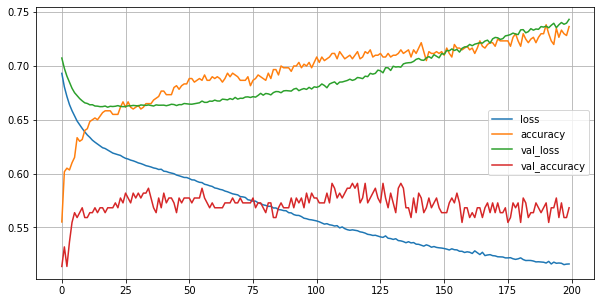

In [406]:
pd.DataFrame(history.history).plot(figsize = (10, 5))
plt.grid(True)
plt.show()

In [389]:
test_loss, test_acc = model.evaluate(Test_Data, Test_Data_Label, verbose=1)
print('test_loss : ', test_loss, 'test_acc : ', test_acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.6219 - accuracy: 0.6622
test_loss :  0.6218793988227844 test_acc :  0.662162184715271


# 사용할 데이터 정하는 과정

In [413]:
Cal_Data = Cal_Total_Data_add_Gender[120]
Cal_Data = Cal_Data.reshape(-1, 10)
Cal_Data_Label_ = Cal_Total_Data_Label[120]

In [ ]:
Normal_generated_Data_Samples = generator1(Cal_Data, training = False)
Sepsis_generated_Data_Samples = generator2(Cal_Data, training = False)

In [392]:
Normal_generated_Data_Samples = np.array(Normal_generated_Data_Samples)
Sepsis_generated_Data_Samples = np.array(Sepsis_generated_Data_Samples)

In [393]:
Cal_Data_1 = Cal_Data.reshape(-1, 10)
Cal_Data_2 = Cal_Data.reshape(-1, 10)

Cal_Data_1 = np.array(Cal_Data_1)
Cal_Data_2 = np.array(Cal_Data_2)

Cal_Data_1 = list(itertools.chain.from_iterable(Cal_Data_1))
Cal_Data_2 = list(itertools.chain.from_iterable(Cal_Data_2))
Cal_Data_1 = np.array(Cal_Data_1)
Cal_Data_2 = np.array(Cal_Data_2)


Normal_generated_Data_Samples = list(itertools.chain.from_iterable(Normal_generated_Data_Samples))
Sepsis_generated_Data_Samples = list(itertools.chain.from_iterable(Sepsis_generated_Data_Samples))
Normal_generated_Data_Samples = np.array(Normal_generated_Data_Samples)
Sepsis_generated_Data_Samples = np.array(Sepsis_generated_Data_Samples)

In [394]:
Cal_Data_1[-5:-2] = Normal_generated_Data_Samples[-5:-2]
Cal_Data_2[-5:-2] = Sepsis_generated_Data_Samples[-5:-2]

In [395]:
Cal_Data_1

array([-0.91968808,  0.36336275, -1.06276742,  1.02151067, -1.25785689,
       -0.25757724, -0.19817518, -0.28352803,  0.48288184,  0.        ])

In [396]:
Cal_Data_2

array([-0.91968808,  0.36336275, -1.06276742,  1.02151067, -1.25785689,
       -0.23330732, -0.21359199,  0.68736023,  0.48288184,  0.        ])

In [397]:
Cal_Data_1 = Cal_Data_1.reshape(-1, 10)
Cal_Data_2 = Cal_Data_2.reshape(-1, 10)

# 분류 모델 예측

In [398]:
pre_data1 = model.predict(Cal_Data_1)
pre_data2 = model.predict(Cal_Data_2)

In [399]:
print('정상 예측 : ', pre_data1, '패혈증 예측 : ', pre_data2)

정상 예측 :  [[0.3068961 0.7137322]] 패혈증 예측 :  [[0.31090197 0.7111054 ]]


In [400]:
Cal_Data_Label_

0.0